In [71]:
!pip install scikit-learn==0.24

In [222]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_boston
import scipy.stats as st
import statsmodels.stats.weightstats as ssw
import math


In [223]:
pg = sns.load_dataset('penguins')
pg.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [224]:
pg.dropna(inplace=True)

In [225]:
pg.shape

(333, 7)

In [226]:
pg.sex.value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [227]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


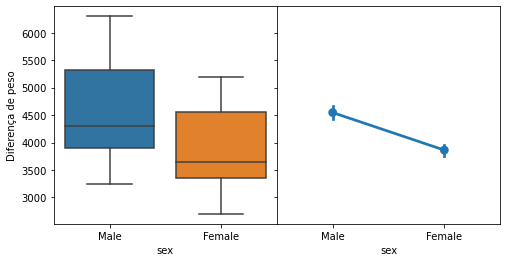

In [228]:
fig,ax=plt.subplots(1,2,figsize=(8,4),sharey=True)
sns.boxplot(data=pg,y='body_mass_g',x='sex',ax=ax[0])
ax[0].set_ylabel('Diferença de peso')

sns.pointplot(data=pg,y='body_mass_g',x='sex',ax=ax[1])
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0)

In [229]:
desvpad=pg.groupby('sex')['body_mass_g'].var().mean()**.5
media_male=pg[pg['sex']=='Male'].groupby('sex')['body_mass_g'].mean()['Male']
media_female=pg[pg['sex']=='Female'].groupby('sex')['body_mass_g'].mean()['Female']
n_male=pg.sex.value_counts()[0]
n_female=pg.sex.value_counts()[1]
diferenca=media_male-media_female


In [234]:
t=diferenca/desvpad*math.sqrt(1/n_male+1/n_female)
p_value=1-st.t.cdf(t,gl)
RC=st.t.ppf(1-p/2,gl)
print(f'Estatística do teste:{t:.2f}')
print(f'Região crítica:{RC:.2f} ou mais')
print(f'P-value: {p_value:.5f} ou mais')

Estatística do teste:0.10
Região crítica:1.97 ou mais
P-value: 0.45914 ou mais


- Ho:μmacho-μfemea=0
- H1:μmacho-μfemea ≠ 0 

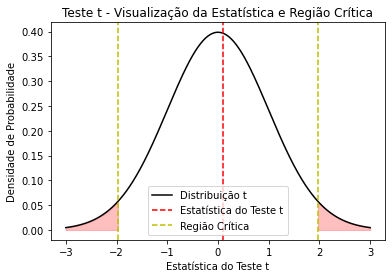

In [238]:
# Gerar valores para o eixo x (intervalo de -5 a 5)
x = np.linspace(-3, 3, 1000)

# Calcular a PDF (Probability Density Function) da distribuição t
pdf = stats.t.pdf(x, gl)

# Plotar a PDF da distribuição t
fig, ax = plt.subplots()
ax.plot(x, pdf, 'black', label='Distribuição t')

# Plotar a estatística do teste t
ax.axvline(t, color='r', linestyle='--', label='Estatística do Teste t')

# Plotar a região crítica
ax.axvline(RC, color='y', linestyle='--', label='Região Crítica')
ax.axvline(-RC, color='y', linestyle='--', )

# Preencher a área da região crítica
ax.fill_between(x, pdf, where=(x >= RC), color='red', alpha=0.25)
ax.fill_between(x, pdf, where=(x <= -RC), color='red', alpha=0.25)

# Definir rótulos e título do gráfico
ax.set_xlabel('Estatística do Teste t')
ax.set_ylabel('Densidade de Probabilidade')
ax.set_title('Teste t - Visualização da Estatística e Região Crítica')

# Adicionar legenda
ax.legend()

# Exibir o gráfico
plt.show()


Aceitamos a hipotese nula uma vez que não houve evidencia de que há diferença estatistica de pesos entre a população de pinguins machos e femeas

# 3. Considere as especies

In [196]:
pg.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [199]:
desvpad=pg.groupby('species')['body_mass_g'].var().mean()**.5
media_Adelie=pg[pg['species']=='Adelie'].groupby('species')['body_mass_g'].mean()
media_Gentoo=pg[pg['species']=='Gentoo'].groupby('species')['body_mass_g'].mean()
media_Chinstrap=pg[pg['species']=='Chinstrap'].groupby('species')['body_mass_g'].mean()


In [218]:
t_adelie=media_Adelie/desvpad*math.sqrt(1/pg.species.value_counts()[0])
t_Gentoo=media_Gentoo/desvpad*math.sqrt(1/pg.species.value_counts()[1])
t_Chinstrap=media_Chinstrap/desvpad*math.sqrt(1/pg.species.value_counts()[2])
p_value_adelia=1-st.t.cdf(t_adelie,gl)
p_value_gentoo=1-st.t.cdf(t_Gentoo,gl)
p_value_chinstrap=1-st.t.cdf(t_Chinstrap,gl)
print(f'O P-value: {float(p_value_adelia):.5f} está associado a especie Adelie\n')
print(f'O P-value: {float(p_value_gentoo):.5f} está associado a especie Gentoo\n')
print(f'O P-value: {float(p_value_chinstrap):.5f} está associado a especie Chinstrap')

O P-value: 0.24834 está associado a especie Adelie

O P-value: 0.15056 está associado a especie Gentoo

O P-value: 0.15798 está associado a especie Chinstrap
